## Autoevaluación 2

###  Producto Interno

#### Pregunta 1

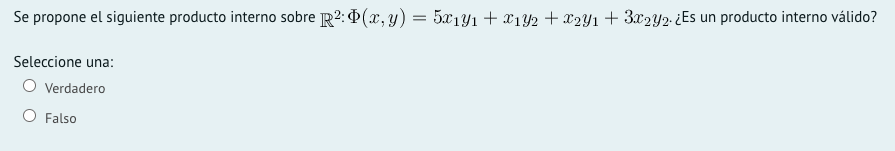

Para que una función  φ(x, y)  sea un producto interno en  \mathbb{R}^2 , debe cumplir con estas propiedades:

1.	Bilinealidad:

	•	Debe ser lineal en cada entrada.

2.	Simetría:

	•	Se debe cumplir que: 

3.	Definido positivo:

	•	Para cualquier vector  x , se debe cumplir:  y   si y solo si  x = 0 .

In [13]:
import numpy as np

def es_producto_interno_valido(matriz):
    """
    Verifica si una matriz define un producto interno válido en R^n.
    
    :param matriz: Matriz de coeficientes del producto interno.
    :return: True si es un producto interno válido, False en caso contrario.
    """
    matriz_np = np.array(matriz, dtype=np.float64)

    # Propiedad 1: Simetría (A debe ser igual a su transpuesta)
    es_simetrica = np.allclose(matriz_np, matriz_np.T)

    print('Es Simetrica: ', es_simetrica)

    # Propiedad 2: Definida positiva (todos los valores propios deben ser positivos)
    valores_propios = np.linalg.eigvals(matriz_np)
    es_definida_positiva = np.all(valores_propios > 0)

    print('Valores Propios: ', valores_propios)
    print('Es Definida Positiva: ', es_definida_positiva)

    # Si cumple ambas propiedades, es un producto interno válido
    return es_simetrica and es_definida_positiva

In [14]:
# 🔹 Matriz del producto interno propuesto
M = [
    [5, 1],  # Coeficientes de x1y1 y x1y2
    [2, 3]   # Coeficientes de x2y1 y x2y2
]

# Verificar si es un producto interno válido
es_valido = es_producto_interno_valido(M)

# 🔹 Resultado
es_valido

Es Simetrica:  False
Valores Propios:  [5.73205081 2.26794919]
Es Definida Positiva:  True


False

### Ortogonalización

#### Pregunta 2

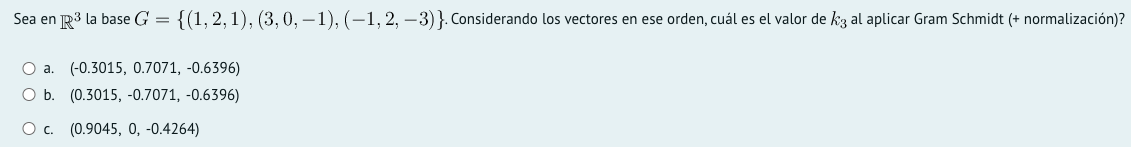

In [3]:
def gram_schmidt_ortonormalizado(vectores):
    """
    Aplica el proceso de Gram-Schmidt y normaliza los vectores obtenidos.
    
    :param vectores: Lista de vectores en R^n (como listas o arrays).
    :return: Lista de vectores ortonormalizados.
    """
    ortonormal = []
    base_ortogonal = []

    for v in vectores:
        # Hacer ortogonal el vector respecto a los anteriores
        w = np.array(v, dtype=np.float64)
        for u in base_ortogonal:
            w -= np.dot(w, u) / np.dot(u, u) * u

        # Verificar si el vector resultante no es el vector cero
        if np.linalg.norm(w) > 1e-10:
            base_ortogonal.append(w)
            ortonormal.append(w / np.linalg.norm(w))  # Normalizar

    return ortonormal

In [4]:
# 🔹 Vectores originales
vectores = [
    (1, 2, 1),
    (3, 0, -1),
    (-1, 2, -3)
]

# Aplicar Gram-Schmidt con normalización
base_ortonormal = gram_schmidt_ortonormalizado(vectores)

# Obtener el tercer vector ortonormal k3
k3 = base_ortonormal[2]

# 🔹 Mostrar resultado
k3

array([-0.26726124,  0.53452248, -0.80178373])

### Matrices Definida Positiva

Una matriz simétrica A   es definida positiva si para todo vector   :


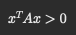


Esto significa que:

- Todos los valores propios de  A  son positivos.
- El determinante de cada submatriz principal es positivo.


Una matriz simétrica  A   es semi-definida positiva si para todo vector  x :





Esto significa que:

- Todos los valores propios de  A  son no negativos (\lambda \geq 0).
- Puede haber valores propios cero, pero ninguno negativo.



#### Pregunta 3

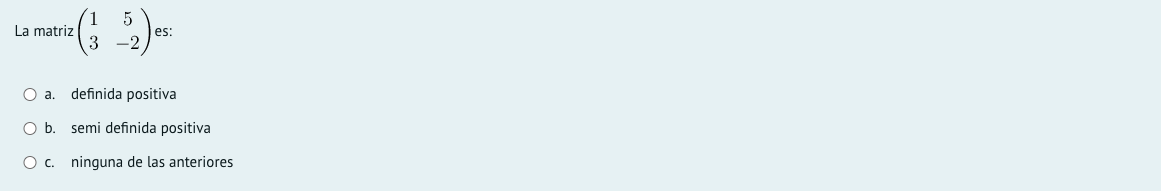

In [10]:
def clasificar_matriz(matriz):
    """
    Clasifica una matriz cuadrada como:
    - Definida Positiva
    - Semi-Definida Positiva
    - Indefinida
    - Ninguna de las anteriores (si no es simétrica)
    
    :param matriz: Matriz cuadrada en forma de lista de listas o array de NumPy.
    :return: Tipo de matriz como string.
    """
    matriz_np = np.array(matriz, dtype=np.float64)

    # Verificar si la matriz es cuadrada
    if matriz_np.shape[0] != matriz_np.shape[1]:
        return "La matriz no es cuadrada, no puede ser clasificada."

    # Verificar si la matriz es simétrica
    if not np.allclose(matriz_np, matriz_np.T):
        return "Ninguna de las anteriores (no es simétrica)"

    # Calcular los valores propios
    valores_propios = np.linalg.eigvals(matriz_np)
    print('Valores Propios: ', valores_propios)

    # Verificar las condiciones de positividad
    if np.all(valores_propios > 0):
        return "Definida Positiva"
    elif np.all(valores_propios >= 0):
        return "Semi-Definida Positiva"
    elif np.all(valores_propios < 0):
        return "Definida Negativa"
    elif np.all(valores_propios <= 0):
        return "Semi-Definida Negativa"
    else:
        return "Indefinida"

In [11]:
# 🔹 Ejemplo de uso con la matriz del problema
A = [
    [1, 5],
    [3, -2]
]

# Clasificar la matriz
clasificacion = clasificar_matriz(A)

# 🔹 Mostrar resultado
clasificacion

'Ninguna de las anteriores (no es simétrica)'

#### Pregunta 4 

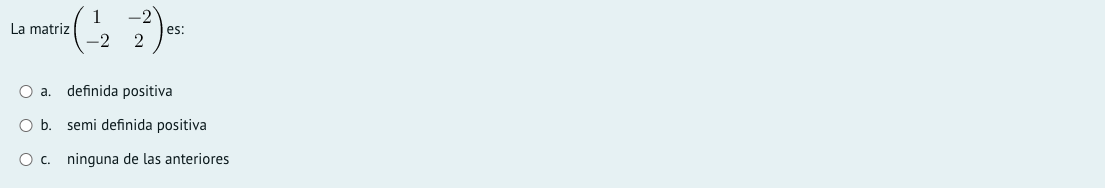

In [12]:
# 🔹 Ejemplo de uso con la matriz del problema
A = [
    [1, -2],
    [-2, 2]
]

# Clasificar la matriz
clasificacion = clasificar_matriz(A)

# 🔹 Mostrar resultado
clasificacion

Valores Propios:  [-0.56155281  3.56155281]


'Indefinida'